In [ ]:
import numpy as np

### 스핀 행렬

In [ ]:
def mat(L):
    data = np.random.choice([-1, 1], size=(L, L)) # -1과 1 중에서 무작위로 LxL 개 뽑음
    return data

### 각 노드의 이웃 노드

In [ ]:
def neighbor(array, n): # n번째 노드의 이웃 노드 인덱스(상하좌우 4개)를 찾음
    L, _ = array.shape

    # 상
    up = n-L # 윗쪽으로 한 칸 이동
    if up < 0: # 이동 전이 맨 윗쪽 열인 경우,
        up += L*L # 아랫쪽으로 L칸 이동하여 주기적 경계 조건 만족

    # 하
    down = n+L # 아랫쪽으로 한 칸 이동
    if down >= L*L: # 이동 전이 맨 아랫쪽 열인 경우,
        down -= L*L # 윗쪽으로 L칸 이동하여 주기적 경계 조건 만족

    # 좌
    left = n-1 # 왼쪽으로 한 칸 이동
    if (left+1)%L == 0: # 이동 전이 맨 왼쪽 열인 경우,
        left += L # 오른쪽으로 L칸 이동(= 아래로 한 칸 이동)하여 주기적 경계 조건 만족
    # 우
    right = n+1 # 오른쪽으로 한 칸 이동
    if right%L == 0: # 이동 후가 맨 왼쪽 열(= 이동 전이 맨 오른쪽 열)인 경우,
        right -= L # 왼쪽으로 L칸 이동(= 위로 한 칸 이동)하여 주기적 경계 조건 만족

    return [up, down, left, right] # 이웃 노드의 인덱스 리스트(상하좌우 순) 출력

### 각 노드의 에너지

In [ ]:
def nb_energy(array, n):
    array_list = [item for sublist in array for item in sublist] # 행렬을 하나의 리스트로
    e = 0 # 에너지 초기화

    neighbors = neighbor(array, n) # neighbors: n번째 노드의 이웃 노드 리스트

    for i in neighbors:
        if array_list[n] == array_list[i]: # n번째 노드와 이웃 노드가 같은 스핀일 경우
            e -= 1 # -1을 sum
        else: # 다른 스핀일 경우
            e += 1 # +1을 sum

    return e # n번째 노드가 갖는 총 에너지 반환

### 행렬의 총 에너지

In [ ]:
def E(array):
    N = len(array)**2 # N = L x L
    result = []

    for i in range(0,N): # 0~(N-1)번째 노드를 반복하여
        result.append(nb_energy(array, i)) # 각 노드의 총 에너지를 저장

    return sum(result)/2 # 각 노드의 총 에너지를 모두 더한 후, (a,b)와 (b,a)의 중복 제거를 위해 2로 나누어 반환

### (0514) 이웃 노드들의 스핀 합

In [ ]:
def nb_sig(array, n):
    array_list = [item for sublist in array for item in sublist] # 행렬을 하나의 리스트로
    e = 0 # 에너지 초기화

    neighbors = neighbor(array, n) # neighbors: n번째 노드의 이웃 노드 리스트

    for i in neighbors:
        e += array_list[i] # 이웃 노드들의 스핀을 sum

    return e # n번째 노드가 갖는 총 에너지 반환

### (0514) Metropolis

In [ ]:
import random
import copy
import matplotlib.pyplot as plt

In [ ]:
def func(array, count, beta=1):
    mu = array # mu 초기화
    exps = [np.exp(-4*beta), np.exp(-8*beta)] # exp 계산을 한 번만
    E_list = []
    S_list = [] # <S>

    for _ in range(count):
        mu_list = [item for sublist in copy.copy(mu) for item in sublist] # 행렬을 하나의 리스트로
        k = random.randint(0, len(mu_list)-1) # 무작위로 인덱스를 뽑음 0~N

        delta = 2 * mu_list[k] * nb_sig(mu,k) # delta E = 2 * 해당 노드 스핀 * 이웃 노드 스핀 합

        if delta <= 0:
            mu_list[k] = -mu_list[k]
        elif delta == 4 and np.random.uniform(0,1) <= exps[0]:
            mu_list[k] = -mu_list[k]
        elif delta == 8 and np.random.uniform(0,1) <= exps[1]:
            mu_list[k] = -mu_list[k]

        mu = np.array(mu_list).reshape((len(array), len(array))) # flip 된 스핀을 포함한 새로운 mu

        E_list.append(E(mu))
        S_list.append(np.sum(mu)/len(mu)**2)

    return E_list, S_list

### (0521) Ising spin

In [ ]:
import pandas

In [ ]:
betas = np.arange(0.0, 1.1, 0.1).tolist() # x축 plot을 위해 beta 리스트 생성

In [ ]:
def find_t(array, beta): # beta에 따른 tau를 구하는 함수
    E, _ = func(array, 10000, beta)
    E = pandas.Series(E[200:]) # 초반 200개 번인
    ans = 0

    for i in range(1,201):
        ans += E.autocorr(lag=i) # lag을 1~500로 바꾸며 sum
    return ans

taus = [] # beta에 따른 tau를 저장할 리스트
for beta in range(0, 11):
    ans = find_t(mat(5), 0.1*beta) # beta를 0.0~1.0로 바꾸며 tau를 구함
    taus.append(ans)
    print(f'Beta = {0.1 * beta}, Tau = {ans}')

Beta = 0.0, Tau = 6.9604568707535694
Beta = 0.1, Tau = 10.992933271780364
Beta = 0.2, Tau = 11.067375864945088
Beta = 0.30000000000000004, Tau = 42.20620630973336
Beta = 0.4, Tau = 69.22187834317444
Beta = 0.5, Tau = 35.40772987470184
Beta = 0.6000000000000001, Tau = 34.867678178959196
Beta = 0.7000000000000001, Tau = 12.529083708378035
Beta = 0.8, Tau = 15.714590686454088
Beta = 0.9, Tau = 8.963544888725805
Beta = 1.0, Tau = 10.39148645966805


In [ ]:
avg_Es = []
avg_Ss = []
err_Es = []
err_Ss = []

for i in range(0,11):
    e, s = func(mat(5), 10000, beta=0.1*i) # beta를 0.0~1.0으로 바꾸며
    e = e[200:] # 초반 번인
    s = s[200:]
    avg_Es.append(np.mean(e)) # E의 평균
    avg_Ss.append(abs(np.mean(s))) # spin의 평균

    t = round(taus[i]) *2 # 각 beta에 따른 tau, 안정성을 위해 반올림 후 2를 곱해 주었음
    new_Es = e[::t] # step이 tau인 새로운 리스트
    new_Ss = s[::t]

    errE = np.std(new_Es)/np.sqrt(len(new_Es)-1) # 표준오차
    err_Es.append(errE)
    errS = np.std(new_Ss)/np.sqrt(len(new_Ss)-1)
    err_Ss.append(errS)

print(err_Es, '\n', err_Ss)

[0.26777126629368586, 0.3413847921274221, 0.37883793785663267, 0.9686286062218754, 1.4235884478519731, 0.6969741847742053, 0.3875617133214439, 0.13881814341112866, 0.07714722073753053, 0.11107404900550315, 0.0511517028563564] 
 [0.007662598603612033, 0.012199786943956974, 0.014806812053283765, 0.0496592838313459, 0.09241659852073239, 0.011937290263711927, 0.00479293759304374, 0.001515422478205379, 0.0007714722073753048, 0.0038468119455211916, 0.0005115170285635637]


<ErrorbarContainer object of 3 artists>

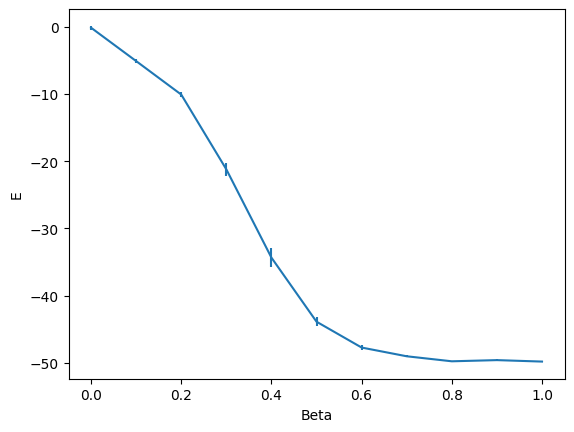

In [ ]:
# E의 평균
plt.xlabel('Beta')
plt.ylabel('E')
plt.errorbar(betas, avg_Es, err_Es)

<ErrorbarContainer object of 3 artists>

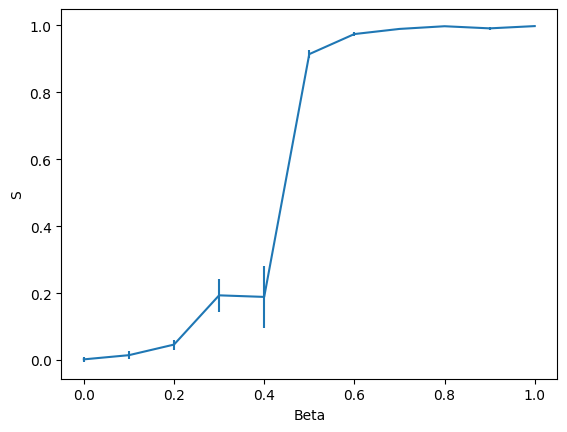

In [ ]:
# spin의 평균
plt.xlabel('Beta')
plt.ylabel('S')
plt.errorbar(betas, avg_Ss, err_Ss)

### (0523)

In [ ]:
Betas = np.arange(0.4, 0.5, 0.005).tolist() # x축 plot을 위해 beta 리스트 생성
Betas.insert(0, 0.3)
Betas.append(0.6)
Betas.insert(0, 0.0)
Betas.append(1.0)

In [ ]:
# 시행횟수 줄여주기

def find_t(array, beta): # beta에 따른 tau를 구하는 함수
    E, _ = func(array, 1000, beta)
    E = pandas.Series(E[200:]) # 초반 200개 번인
    ans = 0

    for i in range(1,201):
        ans += E.autocorr(lag=i) # lag을 1~500로 바꾸며 sum
    return ans

In [ ]:
# L = 5 일 때의 tau
taus5 = []
for beta in Betas:
    ans = find_t(mat(5), beta) # beta를 바꾸며 tau를 구함
    print(f'Beta = {beta}, Tau = {ans}')
    taus5.append(ans)

In [ ]:
taus5

[5.328400109355488,
 -0.8926739425895631,
 52.44555533502842,
 59.03727394248867,
 65.76181323906843,
 27.885750216114676,
 54.87690412693567,
 57.81694910205633,
 -6.758447745528237,
 60.24706403767759,
 105.75552936494132,
 17.751575732352887,
 30.764113712882523,
 -0.6493330828110055,
 27.83191115198598,
 57.52161374955099,
 3.024192830831591,
 4.75536594593759,
 23.856781443996486,
 30.675424437949182,
 59.032032903095526,
 4.829088794761291,
 13.319002056872423,
 nan]

In [ ]:
# L = 10 일 때의 tau
taus10 = []
for beta in Betas:
    ans = find_t(mat(10), beta) # beta를 바꾸며 tau를 구함
    print(f'Beta = {beta}, Tau = {ans}')
    taus10.append(ans)

In [ ]:
taus10

[16.533414188131534,
 67.85260795357252,
 103.19523084719728,
 154.33992590399504,
 108.84841710259565,
 13.849048671624304,
 154.37473073869876,
 52.55647699971697,
 7.655019524784075,
 38.42170795781695,
 117.74505637320102,
 85.96040306002841,
 186.3122481460387,
 143.85650768028373,
 132.35576921785147,
 48.348781723939474,
 163.74222632100387,
 158.54106631289457,
 4.749505657209669,
 157.29163382998215,
 108.1616229232963,
 99.58245411574362,
 181.77819508972044,
 187.01985647199024]

In [ ]:
def find_error(L=5, beta_list=Betas, tau_list=taus5):
    avg_Es = []
    avg_Ss = []
    err_Es = []
    err_Ss = []

    for b in range(0, len(beta_list)):
        e, s = func(mat(L), 10000, beta_list[b]) # beta를 바꾸며
        e = e[200:] # 초반 번인
        s = s[200:]
        avg_Es.append(np.mean(e)) # E의 평균
        avg_Ss.append(abs(np.mean(s))) # spin의 평균

        t = round(tau_list[b]) *2 # 각 L, beta에 따른 tau, 안정성을 위해 반올림 후 2를 곱해 주었음

        new_Es = e[::t] # step이 tau인 새로운 리스트
        new_Ss = s[::t]

        errE = np.std(new_Es)/np.sqrt(len(new_Es)-1) # 표준오차
        err_Es.append(errE)
        errS = np.std(new_Ss)/np.sqrt(len(new_Ss)-1)
        err_Ss.append(errS)

    return avg_Es, avg_Ss, err_Es, err_Ss

In [ ]:
_, L5_avg_S, _, L5_err_S = find_error(L=5, beta_list=Betas, tau_list=taus5)

ValueError: cannot convert float NaN to integer

In [ ]:
L5_avg_S

In [ ]:
_, L10_avg_S, _, L10_err_S = find_error(L=10, beta_list=Betas, tau_list=taus10)

In [ ]:
# L = 5 일 때
plt.xlabel('Beta')
plt.ylabel('m')
plt.title('L = 5')
plt.errorbar(Betas, L5_avg_S, L5_err_S)

In [ ]:
# L = 10 일 때
plt.xlabel('Beta')
plt.ylabel('m')
plt.title('L = 10')
plt.errorbar(Betas, L10_avg_S, L10_err_S)